In [1]:
# ---------------- SETUP ----------------

import os
import sys
import shutil
from PIL import Image
import pandas as pd
import cv2

# Project paths
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
print("Project root:", project_root)

# Add src to sys.path
sys.path.append(os.path.join(project_root, "src"))

# Import functions
from extract_frames import extract_frames
from extract_features import extract_features_from_frames

# Define data paths
raw_data_dir = os.path.join(project_root, "data", "raw_videos_images")
frames_base_dir = os.path.join(project_root, "data", "processed_frames")
features_dir = os.path.join(project_root, "data", "features")
os.makedirs(features_dir, exist_ok=True)

# Label mapping
labels = {"calm": 0, "distress": 1}

Project root: /Users/josebabermejo/Ironhack/silent-scream-detector


I0000 00:00:1749721471.231441  878664 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1749721471.233347  879099 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1749721471.235296  878664 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3


In [2]:
# unique file naming
def extract_frames(source="video", video_path=None, output_dir="frames", frame_interval=10):
    if source == "video":
        video_name = os.path.splitext(os.path.basename(video_path))[0]  # e.g., calm1
        cap = cv2.VideoCapture(video_path)
        count = 0
        saved = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            if count % frame_interval == 0:
                frame_filename = f"{video_name}_frame{saved:05d}.jpg"
                frame_path = os.path.join(output_dir, frame_filename)
                cv2.imwrite(frame_path, frame)
                saved += 1

            count += 1

        cap.release()
        print(f"[INFO] Saved {saved} frames from {video_name}")

# Batch Frame Extraction

for label, class_id in labels.items():
    input_folder = os.path.join(raw_data_dir, label)
    output_folder = os.path.join(frames_base_dir, label)
    os.makedirs(output_folder, exist_ok=True)

    print(f"[INFO] Extracting frames for label '{label}'...")

    for file in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file)

        if file.lower().endswith((".mp4", ".mov", ".avi")):
            extract_frames(source="video", video_path=file_path, output_dir=output_folder, frame_interval=10)

        elif file.lower().endswith((".jpg", ".jpeg", ".png")):
            image_filename = f"{os.path.splitext(file)[0]}_img.jpg"
            dest_path = os.path.join(output_folder, image_filename)
            shutil.copy(file_path, dest_path)
            print(f"[INFO] Copied image to {dest_path}")

print("Frame extraction complete.")

W0000 00:00:1749721471.237202  879101 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1749721471.284935  879106 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1749721471.296312  879111 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


[INFO] Extracting frames for label 'calm'...
[INFO] Saved 60 frames from moses_chill
[INFO] Copied image to /Users/josebabermejo/Ironhack/silent-scream-detector/data/processed_frames/calm/Photo on 10.06.25 at 12.58 #2_img.jpg
[INFO] Saved 54 frames from ana_chill
[INFO] Saved 29 frames from calm_jo_2
[INFO] Saved 78 frames from calm_jo_3
[INFO] Saved 35 frames from sarah_chill_2
[INFO] Saved 49 frames from calm_jo_4
[INFO] Saved 46 frames from sarah_chill
[INFO] Saved 48 frames from moses_chill_2
[INFO] Saved 37 frames from moses_chill_3
[INFO] Saved 59 frames from calm_jo_5
[INFO] Saved 45 frames from ana_chill_2
[INFO] Saved 39 frames from calm_jo
[INFO] Extracting frames for label 'distress'...
[INFO] Copied image to /Users/josebabermejo/Ironhack/silent-scream-detector/data/processed_frames/distress/distressed_img.jpg
[INFO] Copied image to /Users/josebabermejo/Ironhack/silent-scream-detector/data/processed_frames/distress/distressed8_img.jpg
[INFO] Copied image to /Users/josebaberm

In [3]:
# Feature extraction by label
for label, class_id in labels.items():
    frame_folder = os.path.join(frames_base_dir, label)
    feature_csv = os.path.join(features_dir, f"features_{label}.csv")

    print(f"[INFO] Extracting features for label '{label}'...")

    extract_features_from_frames(
        frame_dir=frame_folder,
        output_csv=feature_csv,
        classification=class_id
    )

print("Feature extraction per label complete.")

I0000 00:00:1749721488.295852  878664 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3
W0000 00:00:1749721488.297477  879565 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1749721488.299419  878664 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3
W0000 00:00:1749721488.300939  879564 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


[INFO] Extracting features for label 'calm'...


  0%|                                                   | 0/581 [00:00<?, ?it/s]W0000 00:00:1749721488.335601  879567 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
W0000 00:00:1749721488.361899  879572 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1749721488.375268  879575 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
100%|█████████████████████████████████████████| 581/581 [00:16<00:00, 34.19it/s]
I0000 00:00:1749721505.331189  878664 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3
W0000 00:00:1749721505.332620  879874 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

[INFO] Saved features to /Users/josebabermejo/Ironhack/silent-scream-detector/data/features/features_calm.csv
[INFO] Extracting features for label 'distress'...


W0000 00:00:1749721505.335708  879876 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|                                                   | 0/292 [00:00<?, ?it/s]W0000 00:00:1749721505.383655  879882 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1749721505.394793  879888 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
100%|█████████████████████████████████████████| 292/292 [00:08<00:00, 32.54it/s]

[INFO] Saved features to /Users/josebabermejo/Ironhack/silent-scream-detector/data/features/features_distress.csv
Feature extraction per label complete.


In [4]:
# Merge all features into one file
all_dfs = []

for label in labels:
    csv_path = os.path.join(features_dir, f"features_{label}.csv")
    if os.path.exists(csv_path):
        all_dfs.append(pd.read_csv(csv_path))

if all_dfs:
    full_df = pd.concat(all_dfs, ignore_index=True)
    full_df.to_csv(os.path.join(features_dir, "features_all.csv"), index=False)
    print("Combined features saved to features_all.csv")
else:
    print("No features found to combine.")

Combined features saved to features_all.csv


## Now that I extracted all the features, I will upload the dataset and train my predictive model.

In [6]:
# Load Data and Initial Split
import pandas as pd

features_path = os.path.join(project_root, "data", "features", "features_all.csv")
df = pd.read_csv(features_path)
df

,filename,eye_openness,mouth_openness,brow_furrow,shoulder_tilt,hand_face_dist,head_tilt_angle,wrist_distance,torso_lean,label
0,Photo on 10.06.25 at 12.58 #2_img.jpg,0.022390,0.002169,0.066840,0.053725,1.262623,-89.979346,0.732982,-0.887534,0
1,ana_chill_2_frame00000.jpg,0.020043,0.018281,0.044575,0.010224,1.098815,-88.597715,0.474428,-0.816451,0
2,ana_chill_2_frame00001.jpg,0.012765,0.014055,0.043911,0.016601,1.093836,-87.208557,0.467459,-0.815325,0
3,ana_chill_2_frame00002.jpg,0.016540,0.014933,0.043237,0.030485,1.044341,-85.398308,0.418678,-0.789414,0
4,ana_chill_2_frame00003.jpg,0.018432,0.013551,0.043806,0.026845,1.073326,-85.476588,0.434319,-0.768656,0
...,...,...,...,...,...,...,...,...,...,...
866,sarah_distress_frame00008.jpg,-1.000000,-1.000000,-1.000000,0.026922,0.174553,-83.559070,0.115920,-0.640614,1
867,sarah_distress_frame00009.jpg,-1.000000,-1.000000,-1.000000,0.010495,0.209297,-86.502234,0.123941,-0.563663,1
868,sarah_distress_frame00010.jpg,0.015034,0.003218,0.036106,0.054626,1.007812,-87.899213,0.458079,-0.715200,1
869,sarah_distress_frame00011.jpg,0.015615,0.000891,0.036638,0.049510,1.048586,-88.735888,0.474955,-0.714328,1


In [7]:
# Initial split
features = df.drop(columns=["filename", "label"])
target = df["label"]

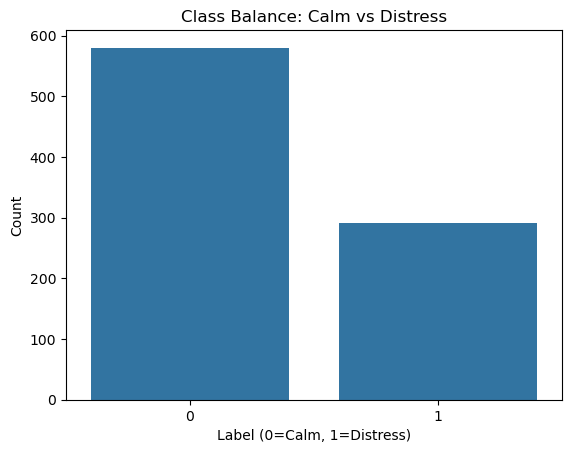

In [8]:
# Class Balance Check
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=target)
plt.title("Class Balance: Calm vs Distress")
plt.xlabel("Label (0=Calm, 1=Distress)")
plt.ylabel("Count")
plt.show()

# If the classes are imbalanced, you may want to:
# Use class weighting in your models.
# Or apply SMOTE (synthetic oversampling) later.

There is indeed some imbalance so I would use SMOT (synthetic oversampling) to balance the dataset.

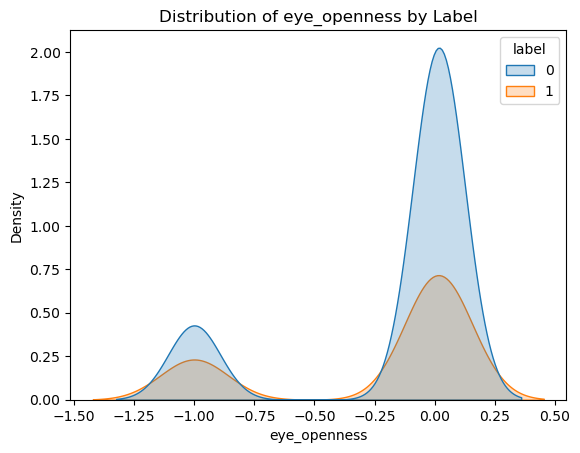

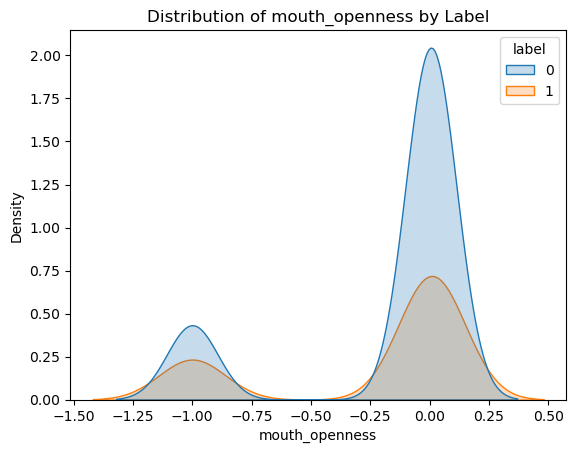

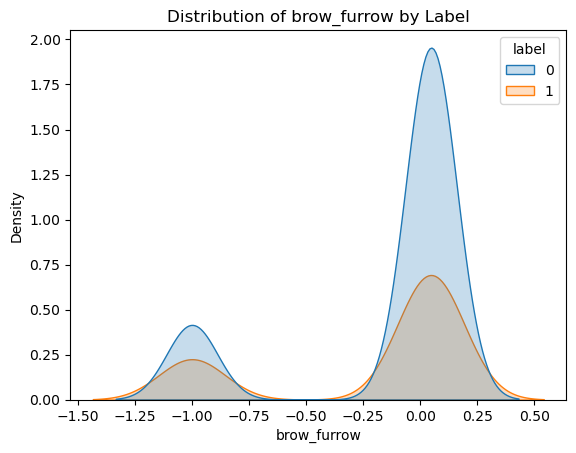

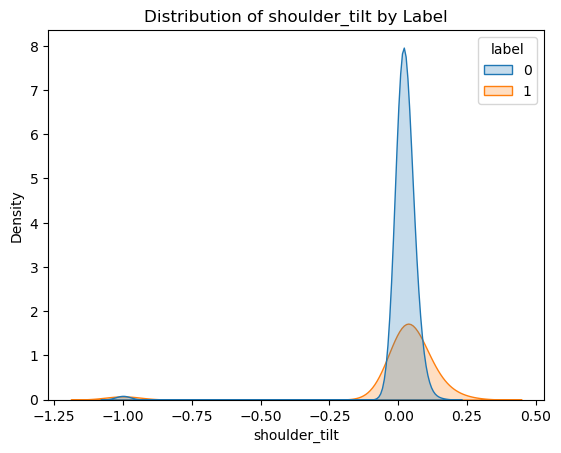

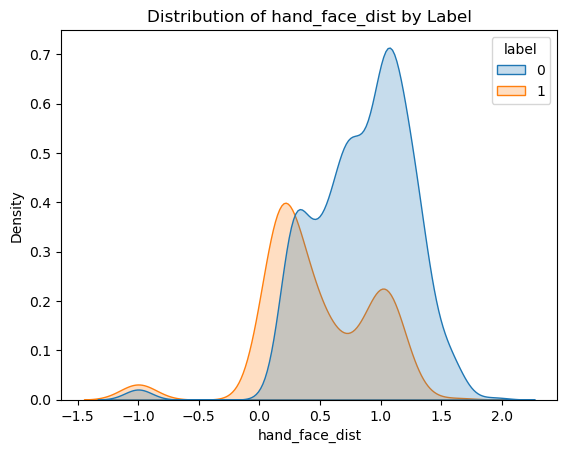

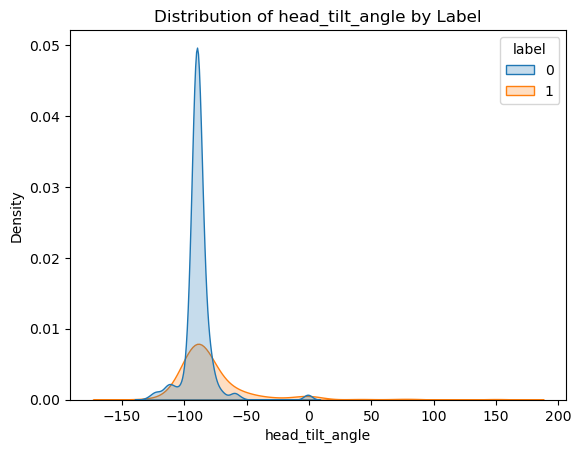

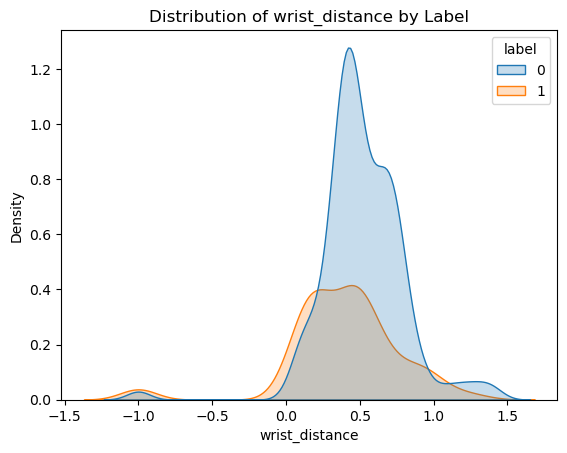

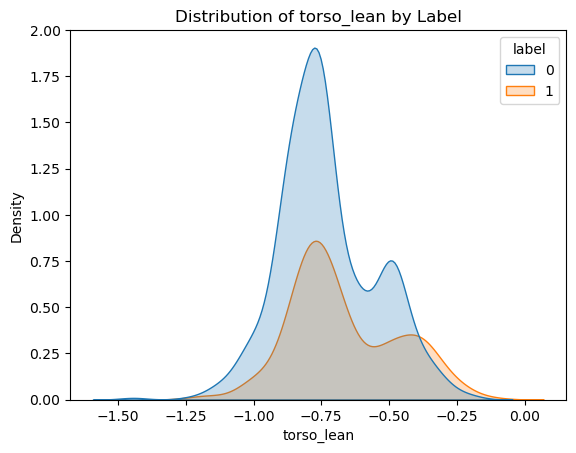

In [10]:
# Feature distributions by label
for col in features.columns:
    sns.kdeplot(data=df, x=col, hue="label", fill=True)
    plt.title(f"Distribution of {col} by Label")
    plt.show()

In [11]:
# Train/test split first to avoid leakage
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=42)

In [12]:
# Balancing: SMOTE (synthetic oversampling)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [13]:
# Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

--- Random Forest ---
              precision    recall  f1-score   support

        Calm       0.95      0.93      0.94       117
    Distress       0.87      0.90      0.88        58

    accuracy                           0.92       175
   macro avg       0.91      0.91      0.91       175
weighted avg       0.92      0.92      0.92       175



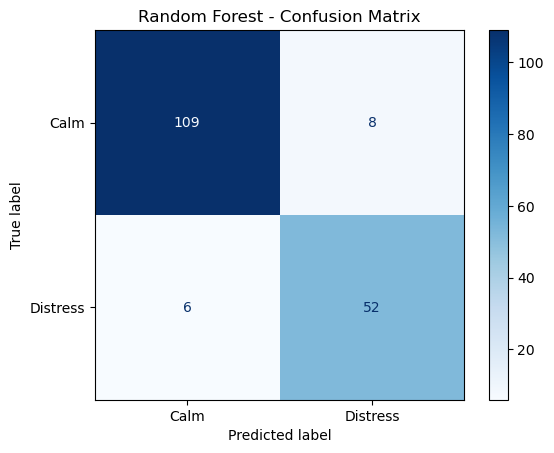

--- Logistic Regression ---
              precision    recall  f1-score   support

        Calm       0.88      0.85      0.86       117
    Distress       0.71      0.76      0.73        58

    accuracy                           0.82       175
   macro avg       0.79      0.80      0.80       175
weighted avg       0.82      0.82      0.82       175



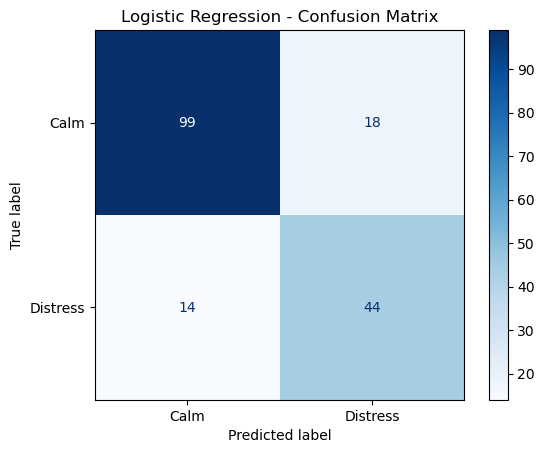

--- KNN ---
              precision    recall  f1-score   support

        Calm       0.90      0.87      0.89       117
    Distress       0.76      0.81      0.78        58

    accuracy                           0.85       175
   macro avg       0.83      0.84      0.84       175
weighted avg       0.85      0.85      0.85       175



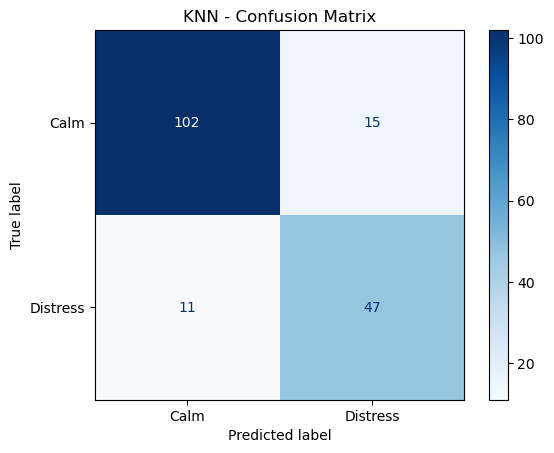

In [14]:
# Model Selection and Evaluation with Emphasis on False Negatives

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

models = {
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=1000),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=["Calm", "Distress"]))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Calm", "Distress"])
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

In [15]:
# Hyperparameter Tuning (GridSearch)
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 15, 20, 30],
    "min_samples_split": [2, 5, 7, 10],
}

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid,
    cv=5,
    scoring=scoring,
    refit="recall",
    return_train_score=True,
    n_jobs=-1
)

# Fit on training data (after SMOTE & scaling)
grid.fit(X_train_scaled, y_train_smote)

print("Best Params:", grid.best_params_)
print("Best CV recall:", grid.best_score_)

Best Params: {'max_depth': 15, 'min_samples_split': 7, 'n_estimators': 100}
Best CV recall: 0.9113838242169237


In [16]:
# Create the final model with the best params + class_weight balanced + random_state for reproducibility
rf_model = RandomForestClassifier(max_depth=15, min_samples_split=7, n_estimators=100, class_weight='balanced', random_state=42)

In [17]:
# Fit on the balanced and scaled training data
rf_model.fit(X_train_scaled, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=7, random_state=42)

Final Model Performance on Test Set:

              precision    recall  f1-score   support

        Calm       0.92      0.93      0.93       117
    Distress       0.86      0.84      0.85        58

    accuracy                           0.90       175
   macro avg       0.89      0.89      0.89       175
weighted avg       0.90      0.90      0.90       175



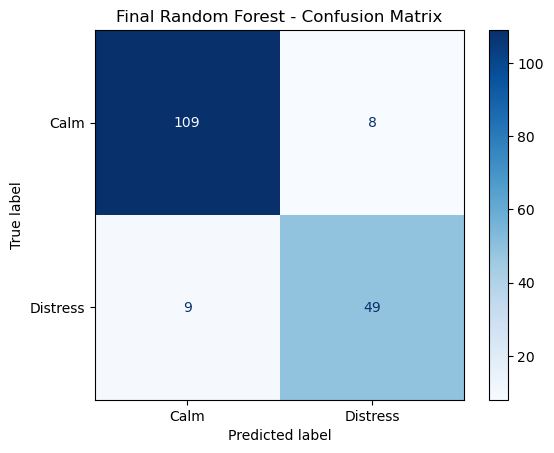

In [18]:
# Now evaluate on the test set
y_test_pred = rf_model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Final Model Performance on Test Set:\n")
print(classification_report(y_test, y_test_pred, target_names=["Calm", "Distress"]))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Calm", "Distress"])
disp.plot(cmap="Blues")
plt.title("Final Random Forest - Confusion Matrix")
plt.show()

### Now that the model is built, the next step is to create a system that flags distress and sends an alert. For that I will need:
- Define what kind of alert I am going to create: Text.
- Where I am going to send it: Slack
- How: see below.

Other additional steps:
- Created a notification bot in Slack
- 

In [20]:
# I need to save the Slack webhook and Slack token in a .env file to keep them safe.
from dotenv import load_dotenv

# Load .env file
load_dotenv()

# Get the Slack webhook URL and the Slack token via .env file
slack_webhook_url = os.getenv("SLACK_WEBHOOK_URL")
slack_token = os.getenv("SLACK_BOT_TOKEN")

In [21]:
from slack_sdk import WebClient
from slack_sdk.errors import SlackApiError
from heapq import nlargest

channel_id = "C091MC23QTS"   
client = WebClient(token=slack_token)

def send_slack_alert_summary(total_count, top_frames):
    try:
        summary_text = f":rotating_light: {total_count} high-confidence distress frames detected.\nTop 3 by confidence:"
        client.chat_postMessage(channel=channel_id, text=summary_text)

        for i, (conf, filename) in enumerate(top_frames):
            img_path = os.path.join(project_root, "data", "processed_frames", "distress", filename)
            
            # This is the correct way to structure the upload for v2
            client.files_upload_v2(
                file=img_path,
                title=f"#{i+1} - {filename}",
                initial_comment=f"Confidence: {conf:.2f}",
                channels=[channel_id]
            )

        print("Slack alert sent.")
    except SlackApiError as e:
        print(f"Slack error: {e.response['error']}")

In [22]:
def warn_if_high_confidence_slack(model, X_scaled, threshold=0.80):
    # Re-link filenames from original df using test indices
    df_test_filenames = df.loc[X_test.index, "filename"].values

    probs = rf_model.predict_proba(X_scaled)[:, 1]
    preds = rf_model.predict(X_scaled)

    distress_cases = [
        (conf, df_test_filenames[i])
        for i, (pred, conf) in enumerate(zip(preds, probs))
        if pred == 1 and conf > threshold
    ]

    for i, (conf, fname) in enumerate(distress_cases):
        print(f"[WARNING] Prediction {i}: DISTRESS in {fname} with confidence {conf:.2f}")

    if distress_cases:
        top_3 = nlargest(3, distress_cases, key=lambda x: x[0])
        send_slack_alert_summary(len(distress_cases), top_3)
    else:
        print("No high-confidence distress cases found.")

In [42]:
warn_if_high_confidence_slack(rf_model, X_test_scaled, threshold=0.80)

[WARNING] Prediction 0: DISTRESS in sarah_distress_frame00008.jpg with confidence 0.94
[WARNING] Prediction 1: DISTRESS in distressed_jo_frame00008.jpg with confidence 0.86
[WARNING] Prediction 2: DISTRESS in ana_distress_frame00037.jpg with confidence 0.88
[WARNING] Prediction 3: DISTRESS in distress_jo2_frame00012.jpg with confidence 0.90
[WARNING] Prediction 4: DISTRESS in ana_distress_frame00007.jpg with confidence 0.89
[WARNING] Prediction 5: DISTRESS in distress_jo2_frame00027.jpg with confidence 0.90
[WARNING] Prediction 6: DISTRESS in distress_jo_3_frame00022.jpg with confidence 0.87
[WARNING] Prediction 7: DISTRESS in distress_jo2_frame00007.jpg with confidence 0.90
[WARNING] Prediction 8: DISTRESS in distress_jo_1_frame00009.jpg with confidence 0.99
[WARNING] Prediction 9: DISTRESS in distress_jo_1_frame00032.jpg with confidence 0.98
[WARNING] Prediction 10: DISTRESS in ana_distress_frame00034.jpg with confidence 0.95
[WARNING] Prediction 11: DISTRESS in distress_jo2_frame000

I will save my train random forest classifier with joblib

In [64]:
import joblib

model_dir = os.path.join(project_root, "models")
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "rf_model.pkl")

joblib.dump(rf_model, model_path)

['/Users/josebabermejo/Ironhack/silent-scream-detector/models/rf_model.pkl']

In [71]:
model_dir = os.path.join(project_root, "models")
os.makedirs(model_dir, exist_ok=True)
scaler_path = os.path.join(model_dir, "scaler.pkl")

joblib.dump(scaler, scaler_path)

['/Users/josebabermejo/Ironhack/silent-scream-detector/models/scaler.pkl']

### Now that I managed to send the Slack alert with images attached, I will build a Streamlit app with interactive interface to upload the videos/pictures/webcam, so we can run the model over it, and get the expected results.